# 1. Install requirements

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df

,tweets,labels
0,sending solidarity whoever doctor manage incre...,Stressed
1,need see hair amp beard gat book appointment b...,Anxious
2,next time meet someone new dont ask ask love,Normal
3,surprise someone love give la senza gift box r...,Lonely
4,raise hand junhoes ocean lotion life rent free...,Normal
...,...,...
29987,originsmp originssmp,Normal
29988,name muhammad asif farooqi im pakistan amp sta...,Lonely
29989,moms mad wont go overnight skiing trip 5 peopl...,Stressed
29990,even tonight youre go bed date someone cannot ...,Normal


## Histogram of the count of text

In [ ]:
df['count'] = df['tweets'].apply(lambda x: len(x.split()))
df.head()

,tweets,labels,count
0,sending solidarity whoever doctor manage incre...,Stressed,10
1,need see hair amp beard gat book appointment b...,Anxious,16
2,next time meet someone new dont ask ask love,Normal,9
3,surprise someone love give la senza gift box r...,Lonely,21
4,raise hand junhoes ocean lotion life rent free...,Normal,12


<Figure size 1000x1000 with 0 Axes>

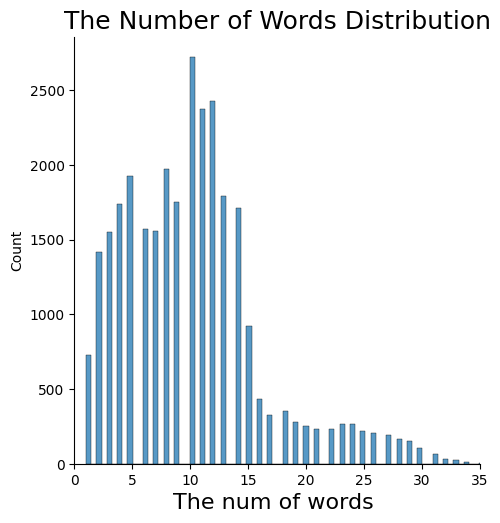

In [ ]:
plt.figure(figsize= (10, 10))

sns.displot(df['count'])

plt.xlim(0, 35)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

###  Bar Plot for each of the new category

In [ ]:
category_count = df['labels'].value_counts()
categories = category_count.index
categories

Index(['Anxious', 'Normal', 'Stressed', 'Lonely'], dtype='object', name='labels')

In [ ]:
category_count

labels
Anxious     8388
Normal      7976
Stressed    6840
Lonely      6788
Name: count, dtype: int64

<ipython-input-7-c2563c153faf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_count.index, y=category_count, palette=colors, ax=ax)


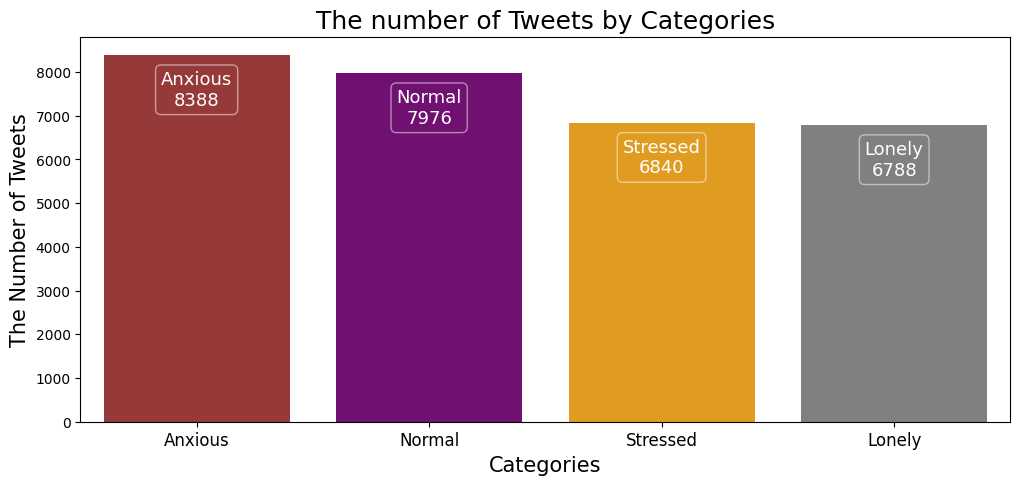

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
other_color = 'gray'

colors = ['brown', 'purple', 'orange', 'gray']
colors += [other_color] * (len(category_count) - len(colors))
sns.barplot(x=category_count.index, y=category_count, palette=colors, ax=ax)
for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n{format(p.get_height(), ".0f")}',
                xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                xytext=(0, -25),
                size=13,
                color='white',
                ha='center',
                va='center',
                textcoords='offset points',
                bbox=dict(boxstyle='round', facecolor='none', edgecolor='white', alpha=0.5))

plt.xlabel('Categories', size=15)
plt.ylabel('The Number of Tweets', size=15)
plt.xticks(size=12)
plt.title("The number of Tweets by Categories", size=18)

plt.show()

In [ ]:
df['encoded_text'] = df['labels'].astype('category').cat.codes
df.head(10)

,tweets,labels,count,encoded_text
0,sending solidarity whoever doctor manage incre...,Stressed,10,3
1,need see hair amp beard gat book appointment b...,Anxious,16,0
2,next time meet someone new dont ask ask love,Normal,9,2
3,surprise someone love give la senza gift box r...,Lonely,21,1
4,raise hand junhoes ocean lotion life rent free...,Normal,12,2
5,mariposa de barrio teach matter guy forever ch...,Normal,8,2
6,good point remember 1013 leave alone pokie clu...,Anxious,13,0
7,mori wip white dress,Normal,4,2
8,okay ik lot people go want im make gc ashnikko...,Anxious,12,0
9,im gonna say,Normal,3,2


In [ ]:
data_texts = df['tweets'].to_list()
data_labels = df['encoded_text'].to_list()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 0 )
train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size = 0.01, random_state = 0 )

In [ ]:
!pip install -q transformers datasets accelerate evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 10.6 MB/s eta 0:00:00


In [53]:
import torch, os
import pandas as pd
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset

In [2]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer,pipeline
from transformers import TrainingArguments, Trainer

In [3]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
df_org = pd.read_csv("train.csv")
df_org.rename(columns={'labels': 'category','tweets':'text'},inplace=True)
df_org.head(10)

,text,category
0,sending solidarity whoever doctor manage incre...,Stressed
1,need see hair amp beard gat book appointment b...,Anxious
2,next time meet someone new dont ask ask love,Normal
3,surprise someone love give la senza gift box r...,Lonely
4,raise hand junhoes ocean lotion life rent free...,Normal
5,mariposa de barrio teach matter guy forever ch...,Normal
6,good point remember 1013 leave alone pokie clu...,Anxious
7,mori wip white dress,Normal
8,okay ik lot people go want im make gc ashnikko...,Anxious
9,im gonna say,Normal


In [5]:
labels = df_org['category'].unique().tolist()
labels = [s.strip() for s in labels ]
labels

['Stressed', 'Anxious', 'Normal', 'Lonely']

In [6]:
for key, value in enumerate(labels):
    print(value)

Stressed
Anxious
Normal
Lonely


In [7]:
NUM_LABELS= len(labels)

id2label={id:label for id,label in enumerate(labels)}

label2id={label:id for id,label in enumerate(labels)}

In [8]:
df_org["labels"]=df_org.category.map(lambda x: label2id[x.strip()])
df_org.head(5)

,text,category,labels
0,sending solidarity whoever doctor manage incre...,Stressed,0
1,need see hair amp beard gat book appointment b...,Anxious,1
2,next time meet someone new dont ask ask love,Normal,2
3,surprise someone love give la senza gift box r...,Lonely,3
4,raise hand junhoes ocean lotion life rent free...,Normal,2


In [9]:
model = AutoModelForSequenceClassification.from_pretrained(
    "finiteautomata/bertweet-base-sentiment-analysis",
    num_labels=NUM_LABELS, id2label=id2label, label2id=label2id,
    ignore_mismatched_sizes=True)

model.to(device)
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis", max_length=512)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TR

In [10]:
model(**tokenizer("I am a hero!", return_tensors="pt").to(device))

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.0493,  0.1540, -0.3562,  0.0378]], device='cuda:0',
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [11]:
SIZE= df_org.shape[0]

train_texts= list(df_org.text[:SIZE//2])

val_texts=   list(df_org.text[SIZE//2:(3*SIZE)//4 ])

test_texts=  list(df_org.text[(3*SIZE)//4:])

train_labels= list(df_org.labels[:SIZE//2])

val_labels=   list(df_org.labels[SIZE//2:(3*SIZE)//4])

test_labels=  list(df_org.labels[(3*SIZE)//4:])

In [13]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [14]:
class DataLoader(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Retrieve tokenized data for the given index
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Add the label for the given index to the item dictionary
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [15]:
train_dataloader = DataLoader(train_encodings, train_labels)

val_dataloader = DataLoader(val_encodings, val_labels)

test_dataset = DataLoader(test_encodings, test_labels)

In [16]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [17]:
!pip install accelerate -U
# after this restart the session

In [20]:
import os
os.mkdir('Pre-trained models')

In [21]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='/content/Pre-trained models',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=10,
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory
    logging_dir='//content/Pre-trained models/multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    fp16=True,
#     load_best_model_at_end=True
)

In [22]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=val_dataloader,
    compute_metrics= compute_metrics
)

In [23]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,0.807600,0.751532,0.637503,0.570716,0.684933,0.658559
200,0.681000,0.738118,0.670979,0.641887,0.655921,0.665692
300,0.665900,0.691521,0.679781,0.595405,0.797884,0.668197
400,0.669600,0.662127,0.685916,0.679358,0.674416,0.688991
500,0.612900,0.621428,0.693118,0.641499,0.697589,0.684409
600,0.608800,0.613478,0.691784,0.626137,0.687805,0.680242
700,0.560800,0.616454,0.694985,0.697725,0.700394,0.702213
800,0.610800,0.616344,0.695652,0.641606,0.695929,0.685298
900,0.614900,0.604687,0.697386,0.613945,0.572518,0.685072
1000,0.589900,0.602609,0.698853,0.695585,0.715186,0.713932


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=2814, training_loss=0.5644497135978433, metrics={'train_runtime': 603.4431, 'train_samples_per_second': 74.552, 'train_steps_per_second': 4.663, 'total_flos': 1456512345785952.0, 'train_loss': 0.5644497135978433, 'epoch': 3.0})

In [24]:
q=[trainer.evaluate(eval_dataset=df_org) for df_org in [train_dataloader, val_dataloader, test_dataset]]

pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.421997,0.760469,0.756393,0.783061,0.772454
val,0.600878,0.711256,0.710689,0.729169,0.725126
test,0.588043,0.706055,0.706488,0.730027,0.726421


from matplotlib import pyplot as plt
_df_0['eval_loss'].plot(kind='hist', bins=20, title='eval_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['eval_Accuracy'].plot(kind='hist', bins=20, title='eval_Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['eval_F1'].plot(kind='hist', bins=20, title='eval_F1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['eval_Precision'].plot(kind='hist', bins=20, title='eval_Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='eval_loss', y='eval_Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='eval_Accuracy', y='eval_F1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='eval_F1', y='eval_Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='eval_Precision', y='eval_Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['eval_loss'].plot(kind='line', figsize=(8, 4), title='eval_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['eval_Accuracy'].plot(kind='line', figsize=(8, 4), title='eval_Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['eval_F1'].plot(kind='line', figsize=(8, 4), title='eval_F1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['eval_Precision'].plot(kind='line', figsize=(8, 4), title='eval_Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='eval_loss', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='eval_Accuracy', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='eval_F1', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='eval_Precision', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Save model

In [25]:
model_path = "mental-health-tweets-classification-model"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('mental-health-tweets-classification-model/tokenizer_config.json',
 'mental-health-tweets-classification-model/special_tokens_map.json',
 'mental-health-tweets-classification-model/vocab.txt',
 'mental-health-tweets-classification-model/bpe.codes',
 'mental-health-tweets-classification-model/added_tokens.json')

In [27]:
import shutil
dir_name ='/content/mental-health-tweets-classification-model'
output_filename = '/content'
shutil.make_archive(output_filename, 'zip', dir_name)

'/content.zip'

In [29]:
import os
import zipfile

# Define the path to the directory containing your saved model and tokenizer
model_path = "mental-health-tweets-classification-model"

# Define the name for the zip file
zip_file_name = "mental-health-tweets-classification-model.zip"

# Define the path to the zip file
zip_file_path = os.path.join(os.getcwd(), zip_file_name)

# Create a zip file
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Add the contents of the model directory to the zip file
    for root, dirs, files in os.walk(model_path):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), model_path))

print(f"Zip file created successfully: {zip_file_path}")


Zip file created successfully: /content/mental-health-tweets-classification-model.zip


## Re_Load model

In [30]:
tokenizer = AutoTokenizer.from_pretrained("mental-health-tweets-classification-model")
model = AutoModelForSequenceClassification.from_pretrained("mental-health-tweets-classification-model")
nlp= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [31]:
df_org.head(5)
stressed_example = df_org['text'][0]
normal_example  = df_org['text'][2]
lonely_example = df_org['text'][3]
anxious_example = df_org['text'][1]
df_org.head(5)

,text,category,labels
0,sending solidarity whoever doctor manage incre...,Stressed,0
1,need see hair amp beard gat book appointment b...,Anxious,1
2,next time meet someone new dont ask ask love,Normal,2
3,surprise someone love give la senza gift box r...,Lonely,3
4,raise hand junhoes ocean lotion life rent free...,Normal,2


In [32]:
pred_label = nlp(anxious_example)[0]['label']
pred_score = nlp(anxious_example)[0]['score']

In [63]:
def Prediction(text):
    result = nlp(text)[0]
    pred_label = result['label']
    pred_score = result['score']
    return pred_label, pred_score

In [52]:
df_org[['pred_label', 'pred_score']] = df_org['text'].apply(lambda x: pd.Series(Prediction(x)))

KeyboardInterrupt: 

In [60]:
nlp('i like you')

[{'label': 'Normal', 'score': 0.9905499815940857}]

In [62]:
sample_1000 = df_org.iloc[:1000,:]
sample_1000

,text,category,labels
0,sending solidarity whoever doctor manage incre...,Stressed,0
1,need see hair amp beard gat book appointment b...,Anxious,1
2,next time meet someone new dont ask ask love,Normal,2
3,surprise someone love give la senza gift box r...,Lonely,3
4,raise hand junhoes ocean lotion life rent free...,Normal,2
...,...,...,...
995,see madonna come papa dont preach,Normal,2
996,okay finish second im invest need third one come,Anxious,1
997,need new movie watch,Lonely,3
998,must nice,Normal,2


In [64]:
sample_1000[['pred_label', 'pred_score']] = sample_1000['text'].apply(lambda x: pd.Series(Prediction(x)))

<ipython-input-64-291145a9eaa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_1000[['pred_label', 'pred_score']] = sample_1000['text'].apply(lambda x: pd.Series(Prediction(x)))
<ipython-input-64-291145a9eaa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_1000[['pred_label', 'pred_score']] = sample_1000['text'].apply(lambda x: pd.Series(Prediction(x)))


In [70]:
sample_1000

,text,category,labels,pred_label,pred_score
0,sending solidarity whoever doctor manage incre...,Stressed,0,Stressed,0.995529
1,need see hair amp beard gat book appointment b...,Anxious,1,Lonely,0.507264
2,next time meet someone new dont ask ask love,Normal,2,Lonely,0.522966
3,surprise someone love give la senza gift box r...,Lonely,3,Lonely,0.536735
4,raise hand junhoes ocean lotion life rent free...,Normal,2,Normal,0.990002
...,...,...,...,...,...
995,see madonna come papa dont preach,Normal,2,Normal,0.990645
996,okay finish second im invest need third one come,Anxious,1,Anxious,0.960532
997,need new movie watch,Lonely,3,Lonely,0.517966
998,must nice,Normal,2,Normal,0.990279


In [80]:
def Mapp_Label(pre_Label):
  if pre_Label == 'Stressed':
    return 0
  elif pre_Label == 'Anxious':
    return 1
  elif pre_Label == 'Normal':
    return 2
  elif pre_Label == 'Lonely':
    return 3

In [82]:
sample_1000['pred_label_int'] = sample_1000['pred_label'].apply(Mapp_Label)

<ipython-input-82-a9e048b27f4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_1000['pred_label_int'] = sample_1000['pred_label'].apply(Mapp_Label)


In [83]:
sample_1000

,text,category,labels,pred_label,pred_score,pred_label_int
0,sending solidarity whoever doctor manage incre...,Stressed,0,Stressed,0.995529,0
1,need see hair amp beard gat book appointment b...,Anxious,1,Lonely,0.507264,3
2,next time meet someone new dont ask ask love,Normal,2,Lonely,0.522966,3
3,surprise someone love give la senza gift box r...,Lonely,3,Lonely,0.536735,3
4,raise hand junhoes ocean lotion life rent free...,Normal,2,Normal,0.990002,2
...,...,...,...,...,...,...
995,see madonna come papa dont preach,Normal,2,Normal,0.990645,2
996,okay finish second im invest need third one come,Anxious,1,Anxious,0.960532,1
997,need new movie watch,Lonely,3,Lonely,0.517966,3
998,must nice,Normal,2,Normal,0.990279,2


In [130]:
sample_1000 = pd.read_csv("/content/prediction_data.csv")
sample_1000.head(5)

,text,category,labels,pred_label,pred_score
0,sending solidarity whoever doctor manage incre...,Stressed,0,Stressed,0.995529
1,need see hair amp beard gat book appointment b...,Anxious,1,Lonely,0.507264
2,next time meet someone new dont ask ask love,Normal,2,Lonely,0.522966
3,surprise someone love give la senza gift box r...,Lonely,3,Lonely,0.536735
4,raise hand junhoes ocean lotion life rent free...,Normal,2,Normal,0.990002


In [126]:
# sample_1000[sample_1000['category']=='Lonely']['category'].value_counts()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your data and performed inference, resulting in true_labels and predicted_labels lists

# Calculate the confusion matrix
conf_matrix = confusion_matrix(sample_1000['labels'], sample_1000['pred_label_int'])

# Define the labels for the confusion matrix
labels = ['stressed', 'anxious', 'normal', 'lonely']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [91]:
# Get unique values in true labels and predicted labels
unique_true_labels = sample_1000['labels'].unique()
unique_pred_labels = sample_1000['pred_label_int'].unique()

# Sort the unique labels
unique_labels = sorted(set(unique_true_labels) | set(unique_pred_labels))

# Display the label order
print("Label Order:")
print(unique_labels)

Label Order:
[0, 1, 2, 3]


In [99]:
fileter = sample_1000['labels'] == sample_1000['pred_label_int']

,text,category,labels,pred_label,pred_score,pred_label_int
0,sending solidarity whoever doctor manage incre...,Stressed,0,Stressed,0.995529,0
3,surprise someone love give la senza gift box r...,Lonely,3,Lonely,0.536735,3
4,raise hand junhoes ocean lotion life rent free...,Normal,2,Normal,0.990002,2
5,mariposa de barrio teach matter guy forever ch...,Normal,2,Normal,0.990521,2
7,mori wip white dress,Normal,2,Normal,0.990591,2
...,...,...,...,...,...,...
995,see madonna come papa dont preach,Normal,2,Normal,0.990645,2
996,okay finish second im invest need third one come,Anxious,1,Anxious,0.960532,1
997,need new movie watch,Lonely,3,Lonely,0.517966,3
998,must nice,Normal,2,Normal,0.990279,2
